# AUTOENCODERS

1. To prepare a dataset for autoencoder learning:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv('./train_1.csv')

# # Check for NaN values in dataframe
# print(df.isnull().sum())

# # Drop rows with NaN values
# df.dropna(inplace=True)

# # Replace NaN values with mean of the column
# df.fillna(df.mean(), inplace=False)

# # Selecting features and target
# X = df[['Open', 'High', 'Low', 'Volume']]
# Y = df['Close']


# Extract features (8x8 pixels)
X = data.iloc[:, :64].values.reshape(-1, 8, 8, 1)

# Extract labels (last column)
Y = data.iloc[:, 64].values.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(categories='auto')
Y = encoder.fit_transform(Y).toarray()

# Splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshaping the data for MinMaxScaler
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to the original shape after scaling
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

print("Shape of training and test sets after scaling:")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of training and test sets after scaling:
Shape of X_train_scaled: (1226, 8, 8, 1)
Shape of X_test_scaled: (307, 8, 8, 1)
Shape of Y_train: (1226, 4)
Shape of Y_test: (307, 4)


2. Create separate encoder and decoder models and connect them into a single model:

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Reshape, Dense
from tensorflow.keras.models import Model

# Define the autoencoder model
input_shape = X_train_scaled.shape[1:]  # Shape of the input data (8, 8, 1)
latent_dim = 64  # Dimensionality of the latent space

# Encoder
encoder_inputs = Input(shape=input_shape)
x = Flatten()(encoder_inputs)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
decoded = Reshape(input_shape)(decoded)

# Autoencoder model
autoencoder = Model(encoder_inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


3. Learn autoencoder and loss function plotting from the learning history provided by the fit function:

Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.1234 - val_loss: 0.0717
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.0492
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.0378
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.0308
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.0265
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0255 - val_loss: 0.0237
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0215
Epoch 8/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0197
Epoch 9/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0181
Epoch 10/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0167
Epoch 11/20
39/39 [

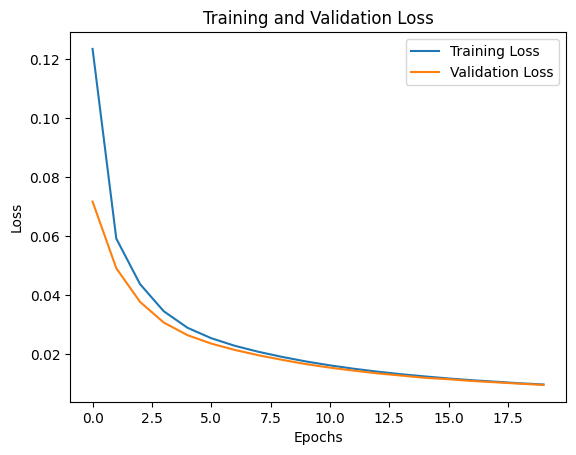

In [ ]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))

# Accessing loss history and plotting
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4. Generate latent features as an output from the encoder:

In [ ]:
# Extracting the encoder part
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Getting latent features from the encoder
latent_features_train = encoder.predict(X_train_scaled)
latent_features_test = encoder.predict(X_test_scaled)

# Displaying the shapes of the latent features
print("Shape of latent features (train):", latent_features_train.shape)
print("Shape of latent features (test):", latent_features_test.shape)

# Displaying the first few rows of latent features
print("Latent features (train):")
print(latent_features_train[:5])  # Displaying the first 5 rows
print("\nLatent features (test):")
print(latent_features_test[:5])  # Displaying the first 5 rows


10/10 [==============================] - 0s 2ms/step
Shape of latent features (train): (1226, 64)
Shape of latent features (test): (307, 64)
Latent features (train):
[[0.         0.125      0.75       1.         0.1875     0.
  0.         0.         0.         0.33333334 0.875      0.875
  0.25       0.         0.         0.         0.         0.5625
  0.4375     0.4375     0.5        0.         0.         0.
  0.         0.375      0.125      0.5        0.5        0.
  0.         0.         0.         0.         0.         0.625
  0.3125     0.         0.         0.         0.         0.
  0.         0.875      0.125      0.         0.         0.
  0.         0.         0.5625     1.         0.6875     0.5
  0.3125     0.         0.         0.2        0.875      0.6875
  0.75       1.         0.5625     0.        ]
 [0.         0.125      0.75       0.5        0.         0.
  0.         0.         0.         0.6        1.         0.875
  0.5625     0.         0.         0.         0. 

5. To generate output images based on latent features

10/10 [==============================] - 0s 3ms/step
Generated images:


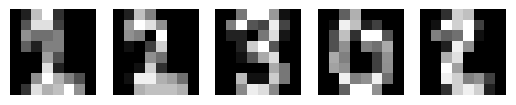

In [ ]:
# Extracting the encoder and decoder parts separately
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
decoder_input = Input(shape=(latent_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)  # Assuming the last layer is the decoder

decoder = Model(inputs=decoder_input, outputs=decoder_output)

# Generate output images based on latent features
output_images_train = decoder.predict(latent_features_train)
output_images_test = decoder.predict(latent_features_test)

# Display some generated output images (e.g., first 5)
print('Generated images:')
for i in range(5):
    # plt.subplot(2, 5, i + 1)
    # plt.imshow(X_train_scaled[i].reshape(8, 8), cmap='gray')
    # plt.title('Original')
    # plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(output_images_train[i].reshape(8, 8), cmap='gray')

    plt.axis('off')

plt.show()
